In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
# Load the Airbnb dataset (Kaggle auto-mounts it in /kaggle/input/)
df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [3]:
# Quick look at the data
print(df.shape)
df.head()
df.replace([np.inf, -np.inf], np.nan, inplace=True)

(48895, 16)


In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.fillna({
    'name': 'No Name',
    'host_name': 'Unknown Host',
    'last_review': 'No Reviews',
    'reviews_per_month': 0
}, inplace=True)

In [6]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
# remove listings with unrealistic prices (>1000)
df = df[df['price'] < 1000]

# remove listings with very high minimum nights (>365)
df = df[df['minimum_nights'] < 365]

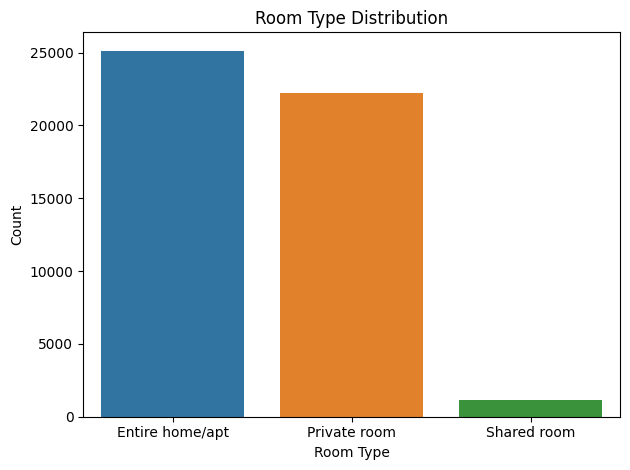

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# quick sanity checks
assert 'room_type' in df.columns, "Column 'room_type' not found"
assert len(df) > 0, "DataFrame is empty after filtering"

ax = sns.countplot(data=df,
                   x='room_type',
                   order=df['room_type'].value_counts().index)

ax.set_title("Room Type Distribution")
ax.set_xlabel("Room Type")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


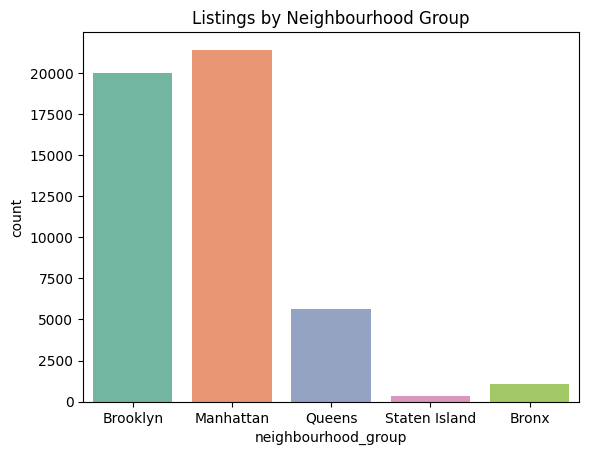

In [9]:
sns.countplot(x="neighbourhood_group", data=df, palette="Set2")
plt.title("Listings by Neighbourhood Group")
plt.show()


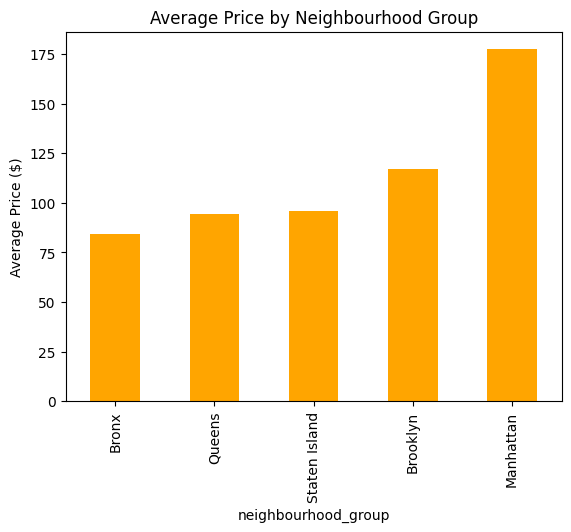

In [10]:
df.groupby("neighbourhood_group")["price"].mean().sort_values().plot(kind="bar", color="orange")
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


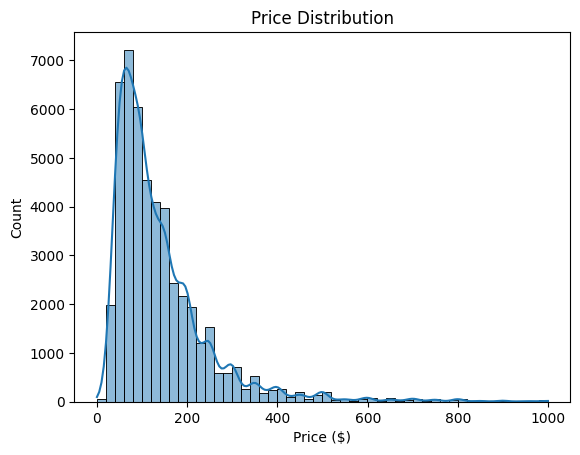

In [11]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.show()


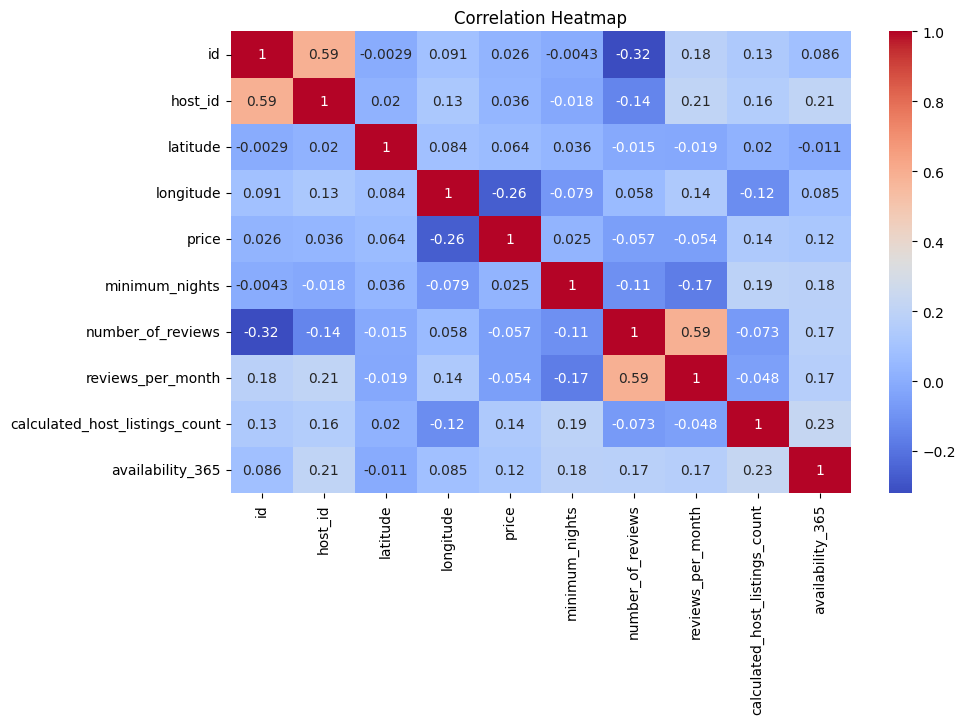

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [14]:
df['host_name'] = df['host_name'].str.lower().str.strip()
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [15]:
import datetime as dt
today = dt.datetime.today()

df['listing_age'] = (today - df['last_review']).dt.days
df['price_per_night'] = df['price'] / df['minimum_nights']

In [16]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 48557 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48557 non-null  int64         
 1   name                            48557 non-null  object        
 2   host_id                         48557 non-null  int64         
 3   host_name                       48557 non-null  object        
 4   neighbourhood_group             48557 non-null  object        
 5   neighbourhood                   48557 non-null  object        
 6   latitude                        48557 non-null  float64       
 7   longitude                       48557 non-null  float64       
 8   room_type                       48557 non-null  object        
 9   price                           48557 non-null  int64         
 10  minimum_nights                  48557 non-null  int64         
 11  number_

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [17]:
# Option 1: Keep last_review as datetime, fill missing with NaT (null datetime)
df['last_review'] = df['last_review'].fillna(pd.NaT)

# Option 2: If you want a string column instead of datetime
df['last_review_str'] = df['last_review'].astype(str).replace("NaT", "No Reviews")

# For listing_age
df['listing_age'] = df['listing_age'].fillna(0)


In [18]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 48557 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48557 non-null  int64         
 1   name                            48557 non-null  object        
 2   host_id                         48557 non-null  int64         
 3   host_name                       48557 non-null  object        
 4   neighbourhood_group             48557 non-null  object        
 5   neighbourhood                   48557 non-null  object        
 6   latitude                        48557 non-null  float64       
 7   longitude                       48557 non-null  float64       
 8   room_type                       48557 non-null  object        
 9   price                           48557 non-null  int64         
 10  minimum_nights                  48557 non-null  int64         
 11  number_